<a href="https://colab.research.google.com/github/pavansde/DataAnalysis/blob/main/Zomato_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline

In [5]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Zomato Project/Zomato data .csv')

In [6]:
dataframe.head(10)

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
5,Timepass Dinner,Yes,No,3.8/5,286,600,Buffet
6,Rosewood International Hotel - Bar & Restaurant,No,No,3.6/5,8,800,Buffet
7,Onesta,Yes,Yes,4.6/5,2556,600,Cafes
8,Penthouse Cafe,Yes,No,4.0/5,324,700,other
9,Smacznego,Yes,No,4.2/5,504,550,Cafes


In [7]:
dataframe.isna().sum()

,0
name,0
online_order,0
book_table,0
rate,0
votes,0
approx_cost(for two people),0
listed_in(type),0


##Convert data type of columns Rating

In [13]:
def handle_rating(value):
  value = str(value).split('/')
  value = value[0]
  return float(value)

dataframe['rate'] = dataframe['rate'].apply(handle_rating)

dataframe.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [21]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Conclusion - Majority of the restaurants falls under Dining

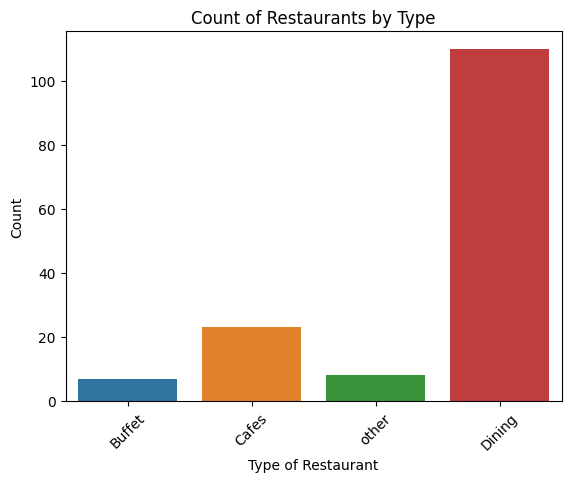

In [47]:
sns.countplot(x = 'listed_in(type)', data = dataframe, hue = 'listed_in(type)')
plt.xlabel('Type of Restaurant')
plt.title('Count of Restaurants by Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Conclusion - Dining restaurants have more votes

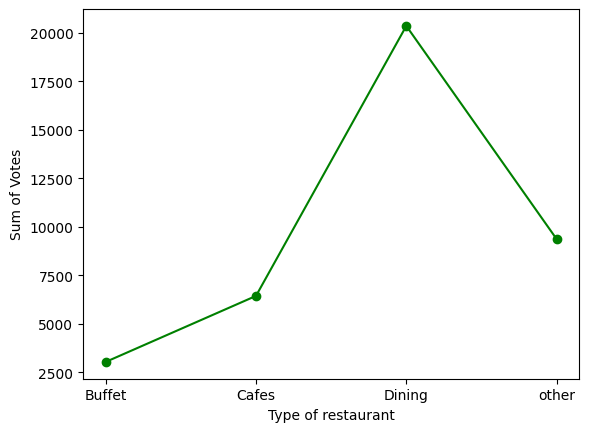

In [67]:
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'Votes': grouped_data})
plt.plot(result,marker='o', c='green')
plt.xlabel('Type of restaurant')
plt.ylabel('Sum of Votes')
plt.show()

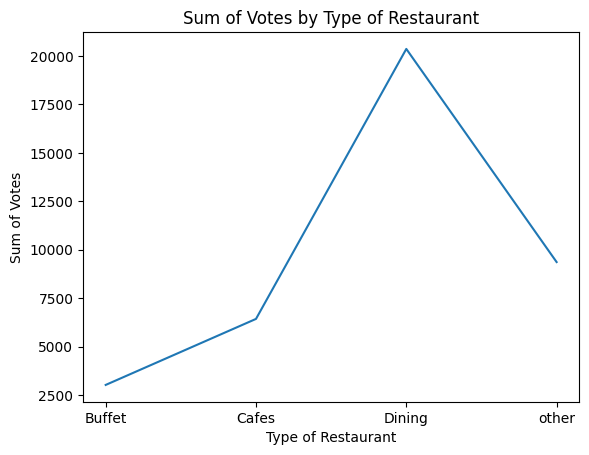

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group the data and aggregate the votes by 'listed_in(type)'
grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum().reset_index()

# Create a Seaborn barplot
sns.lineplot(x='listed_in(type)', y='votes', data=grouped_data)

# Add labels and title
plt.xlabel('Type of Restaurant')
plt.ylabel('Sum of Votes')
plt.title('Sum of Votes by Type of Restaurant')

# Show the plot
plt.show()


##Conclusion - Majority of the restaurants received ratings from 3.5 to 3.7

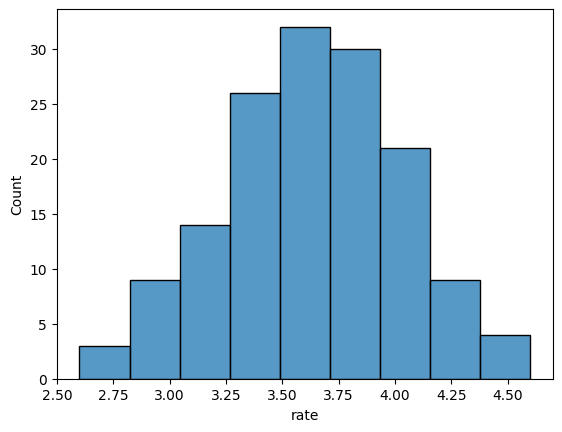

In [70]:
sns.histplot(x='rate',data=dataframe)
plt.show()